<a href="https://colab.research.google.com/github/Digvijay25182316/ProdigyInfoTech_Ml/blob/main/catsanddogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"digvijayedake","key":"5a621bc12770b296bb0defb15d28d1ca"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                  146KB  2023-10-05 06:45:37           9776        223  1.0              
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                   47KB  2023-08-26 11:04:57          38998       1119  1.0              
willianoliveiragibin/healthcare-insurance                   Healthcare Insurance                               16KB  2023-10-12 20:24:09            673         22  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Datase

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! echo '{"username":"vanshkanjani","key":"a9ab53a2d612a23e7eedb7d16640a246"}' > /root/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats -p /content/


100% 810M/812M [00:36<00:00, 24.5MB/s]
100% 812M/812M [00:37<00:00, 23.0MB/s]


In [ ]:
! unzip "dogs-vs-cats" -d .

Archive:  dogs-vs-cats.zip
  inflating: ./sampleSubmission.csv  
  inflating: ./test1.zip             
  inflating: ./train.zip             


In [ ]:
!mkdir train
!mkdir train/content
!mkdir train/content/cat
!mkdir train/content/dog

In [ ]:
! unzip "train.zip" -d ./traindata
! unzip "test1.zip" -d ./testdata

Streaming output truncated to the last 5000 lines.
  inflating: ./testdata/test1/5499.jpg  
  inflating: ./testdata/test1/55.jpg  
  inflating: ./testdata/test1/550.jpg  
  inflating: ./testdata/test1/5500.jpg  
  inflating: ./testdata/test1/5501.jpg  
  inflating: ./testdata/test1/5502.jpg  
  inflating: ./testdata/test1/5503.jpg  
  inflating: ./testdata/test1/5504.jpg  
  inflating: ./testdata/test1/5505.jpg  
  inflating: ./testdata/test1/5506.jpg  
  inflating: ./testdata/test1/5507.jpg  
  inflating: ./testdata/test1/5508.jpg  
  inflating: ./testdata/test1/5509.jpg  
  inflating: ./testdata/test1/551.jpg  
  inflating: ./testdata/test1/5510.jpg  
  inflating: ./testdata/test1/5511.jpg  
  inflating: ./testdata/test1/5512.jpg  
  inflating: ./testdata/test1/5513.jpg  
  inflating: ./testdata/test1/5514.jpg  
  inflating: ./testdata/test1/5515.jpg  
  inflating: ./testdata/test1/5516.jpg  
  inflating: ./testdata/test1/5517.jpg  
  inflating: ./testdata/test1/5518.jpg  
  inflatin

In [ ]:
!ls test/cat/

ls: cannot access 'test/cat/': No such file or directory


In [ ]:
!bash -c 'mv traindata/train/cat.{0..4000}.jpg train/content/cat'
!bash -c 'mv traindata/train/dog.{0..4000}.jpg train/content/dog'

In [ ]:
!mkdir ./test
!mkdir ./test/dog
!mkdir ./test/cat

In [ ]:
!bash -c 'mv traindata/train/cat.{5000..6000}.jpg test/cat'
!bash -c 'mv traindata/train/dog.{5000..6000}.jpg test/dog'

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('train/content/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8002 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
251/251 [==============================] - 38s 92ms/step - loss: 0.8931 - accuracy: 0.5804 - val_loss: 0.7589 - val_accuracy: 0.6998
Epoch 2/15
251/251 [==============================] - 23s 91ms/step - loss: 0.7225 - accuracy: 0.6650 - val_loss: 0.6760 - val_accuracy: 0.7263
Epoch 3/15
251/251 [==============================] - 22s 87ms/step - loss: 0.6876 - accuracy: 0.6783 - val_loss: 0.6108 - val_accuracy: 0.7418
Epoch 4/15
251/251 [==============================] - 23s 91ms/step - loss: 0.6377 - accuracy: 0.7023 - val_loss: 0.5809 - val_accuracy: 0.6993
Epoch 5/15
251/251 [==============================] - 23s 92ms/step - loss: 0.6029 - accuracy: 0.7189 - val_loss: 0.5980 - val_accuracy: 0.7682
Epoch 6/15
251/251 [==============================] - 24s 97ms/step - loss: 0.5760 - accuracy: 0.7339 - val_loss: 0.5628 - val_accuracy: 0.7772
Epoch 7/15
251/251 [==============================] - 23s 90ms/step - loss: 0.5679 - accuracy: 0.7341 - val_loss: 0.5213 - val_accuracy:

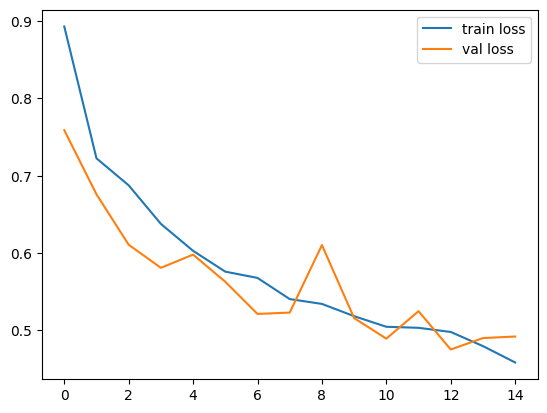

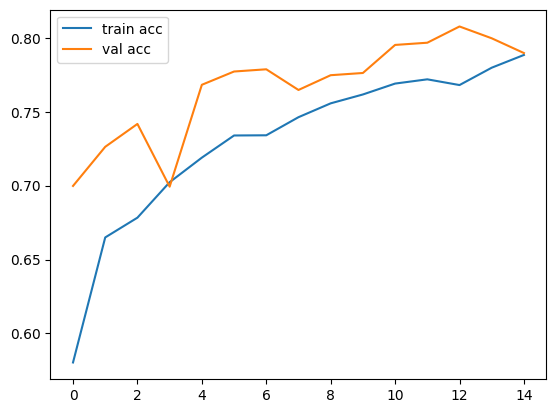

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [ ]:
from tensorflow.keras.models import load_model

# load model
model = load_model('model_rcat_dog.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
!ls test/dog/dog.5015.jpg

test/dog/dog.5015.jpg


In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('test/dog/dog.5015.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 171ms/step


In [ ]:
result

array([[1.2680005]], dtype=float32)

In [ ]:
!ls test/cat/cat.5017.jpg

test/cat/cat.5017.jpg


In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('test/cat/cat.5017.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 18ms/step


In [ ]:
result

array([[-2.175421]], dtype=float32)

In [ ]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

path = "/content/testdata/test1/"
fileList = os.listdir(path)
predictions = []

for file in fileList:
    img_path = os.path.join(path, file)
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = test_image / 255
    test_image = np.expand_dims(test_image, axis=0)
    result = cnn.predict(test_image)  # Make sure 'cnn' is defined previously
    predictions.append(result[0][0])
    print(f"{len(predictions)} images completed")

print(f"Number of images processed: {len(predictions)}")


Streaming output truncated to the last 5000 lines.
10001 images completed
1/1 [==============================] - 0s 30ms/step
10002 images completed
1/1 [==============================] - 0s 36ms/step
10003 images completed
1/1 [==============================] - 0s 31ms/step
10004 images completed
1/1 [==============================] - 0s 38ms/step
10005 images completed
1/1 [==============================] - 0s 41ms/step
10006 images completed
1/1 [==============================] - 0s 45ms/step
10007 images completed
1/1 [==============================] - 0s 58ms/step
10008 images completed
1/1 [==============================] - 0s 35ms/step
10009 images completed
1/1 [==============================] - 0s 28ms/step
10010 images completed
1/1 [==============================] - 0s 25ms/step
10011 images completed
1/1 [==============================] - 0s 33ms/step
10012 images completed
1/1 [==============================] - 0s 35ms/step
10013 images completed
1/1 [=====================

In [ ]:
# Count occurrences of -1 in the DataFrame
predictions

[0.37400073,
 1.0725788,
 -0.8487262,
 -0.53994787,
 0.5612632,
 0.33796996,
 -0.6464796,
 0.97983944,
 1.1611996,
 0.40522832,
 0.7828451,
 0.49368954,
 0.95690656,
 0.043877207,
 2.4621024,
 -2.2019687,
 -0.04193435,
 0.5500262,
 -0.50737226,
 -1.3186293,
 -0.23378149,
 -1.8142235,
 2.512882,
 0.15797517,
 2.3691669,
 -1.6935693,
 -0.21014506,
 1.4867547,
 -1.2443907,
 2.929202,
 2.4845452,
 -1.8503103,
 -1.7342601,
 -1.2457175,
 2.9418464,
 0.14646623,
 -1.2172886,
 -0.549986,
 -0.34160236,
 -1.4574255,
 -0.8554547,
 -3.3289409,
 5.3465257,
 1.0313704,
 -1.3742701,
 -1.7329187,
 1.2363789,
 0.42913014,
 -0.9449979,
 -1.1620692,
 1.9012,
 3.1358197,
 -1.4009421,
 1.055773,
 2.8700728,
 -1.7451864,
 3.030336,
 2.8119926,
 -1.2493494,
 -1.816514,
 0.6175897,
 -0.7798917,
 0.41856685,
 -0.5992641,
 1.8296006,
 -1.8878827,
 2.9018528,
 -0.91859686,
 3.340457,
 -0.7584608,
 1.0141889,
 -1.622569,
 -0.635946,
 -0.21069661,
 -0.17667827,
 -2.1137562,
 -0.870085,
 2.3083184,
 -1.4243841,
 2.

In [ ]:
import pandas as pd
pred=pd.DataFrame(predictions)
SampleDF=pd.read_csv("sampleSubmission.csv")
subsets=pd.concat([SampleDF["id"],pred],axis=1)
subsets.columns=["id","label"]
subsets.to_csv("sample_submission1.csv",index=False)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('testdata/test1/1004.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

1/1 [==============================] - 0s 18ms/step
The image classified is dog
